<a href="https://colab.research.google.com/github/HinataTsuji/Data-Science-Assignment-Grp15/blob/main/EDA_DSAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA & Visualization
- Perform EDA
- Create graphs & insights
- Frame "Asking Questions"
- Write EDA section in report

*Unit to note: Price(RM), mileage(km)

**Question: How does the Brand Origin (Local vs. Foreign) affect the interaction between Mileage and Depreciation Rate over a 10-year lifecycle?**

End result for ML is the prediction of resale price for a car model (existing in dataset). From mileage after car used, behaviour, find depreciation rate. From depreciation rate predict car resale price after certain period of time (e.g. 5 years after).

Manufacturing brand as the key indicator.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cleaned_balanced_4000_final.csv')

In [ ]:
# Rename columns to include the units
df = df.rename(columns={'Price': 'Price(RM)', 'Mileage': 'Mileage(km)', 'Make': 'Brand'})

In [ ]:
df.head()

,Brand,Model,Year,Price(RM),Mileage(km),Gear_Type,Brand_Origin,Car_Age
0,Perodua,Viva,2014,32756,77500,Manual,Local,11
1,Mercedes-Benz,Mercedes-Benz E200,2016,152800,132500,Automatic,Foreign,9
2,BMW,BMW 520i,2012,56900,127500,Automatic,Foreign,13
3,BMW,BMW 520i,2013,68000,92500,Automatic,Foreign,12
4,Perodua,Viva,2010,6500,90000,Automatic,Local,15


In [ ]:
# Count unique values in each column (helps identify categorical vs numeric features)
for feature in df.columns:
    print(f"{feature}: {df[feature].nunique()}")

# Small features: Gear_Type, Brand_Origin, Car_Age

Brand: 31
Model: 198
Year: 27
Price(RM): 856
Mileage(km): 135
Gear_Type: 2
Brand_Origin: 2
Car_Age: 27


**Univariate Analysis**

1. Categorical Values

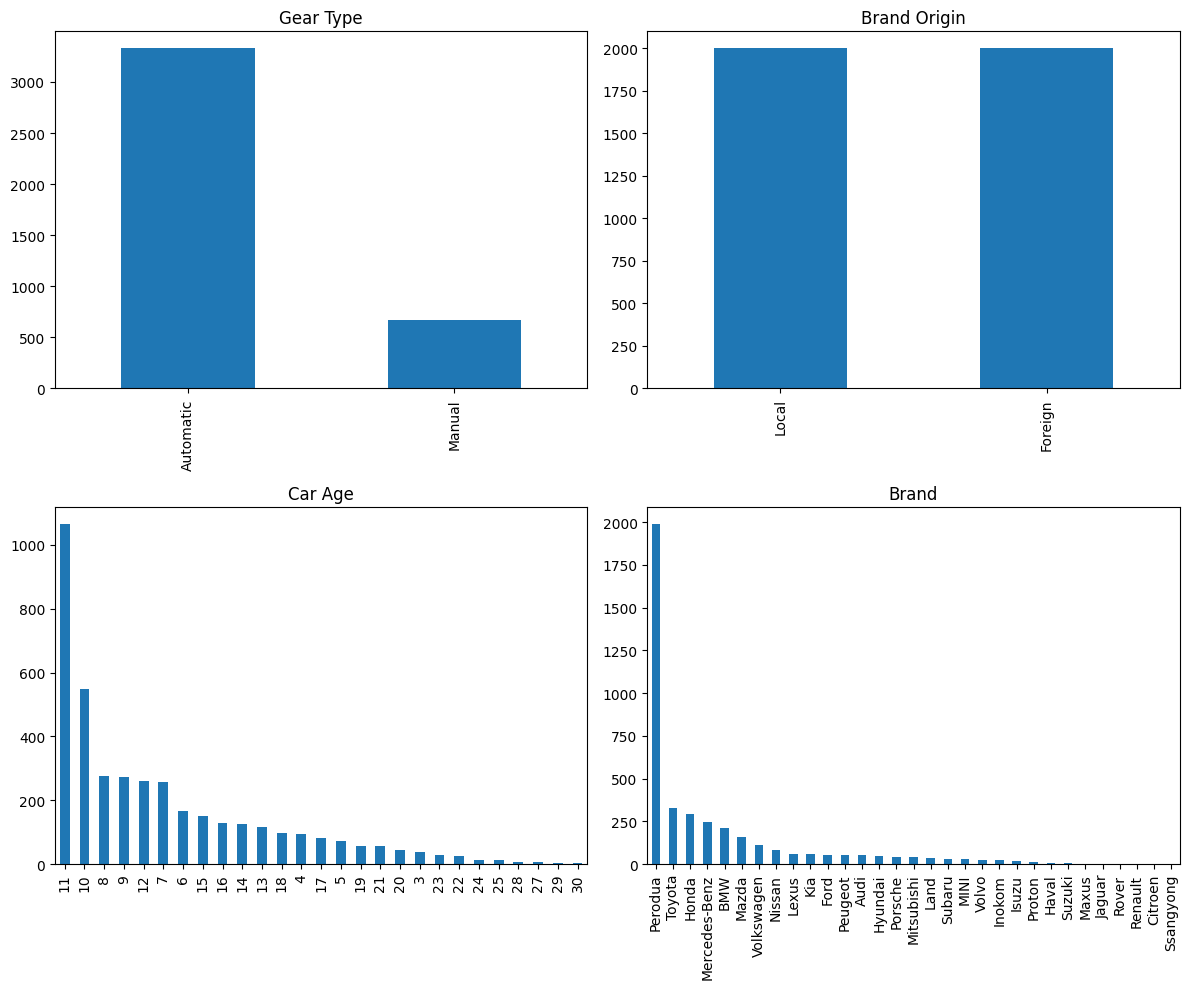

In [ ]:
import matplotlib.pyplot as plt

# Define the grid: 2 rows, 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# List of columns and their corresponding titles
cols = ['Gear_Type', 'Brand_Origin', 'Car_Age', 'Brand']
titles = ['Gear Type', 'Brand Origin', 'Car Age', 'Brand']

# Flatten axes to easily iterate through them
for ax, col, title in zip(axes.flatten(), cols, titles):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')  # Removes redundant x-labels for a cleaner look

# Automatically adjust spacing between plots
plt.tight_layout()
plt.show()

Observation:
1. There are more Automatic Gear-Type cars than Manual Gear-Type cars. Which shows that people more prefer to use Automatic cars and Manual cars' use are becoming lesser. / Manuals are rarer.
2. In this dataset we are analyzing a balanced number of local and foreign brands.
3. The car age is mostly distributed between 7-11 years.
4. Perodua, a local car brand is the majority of choice of car.

2. Numerical values

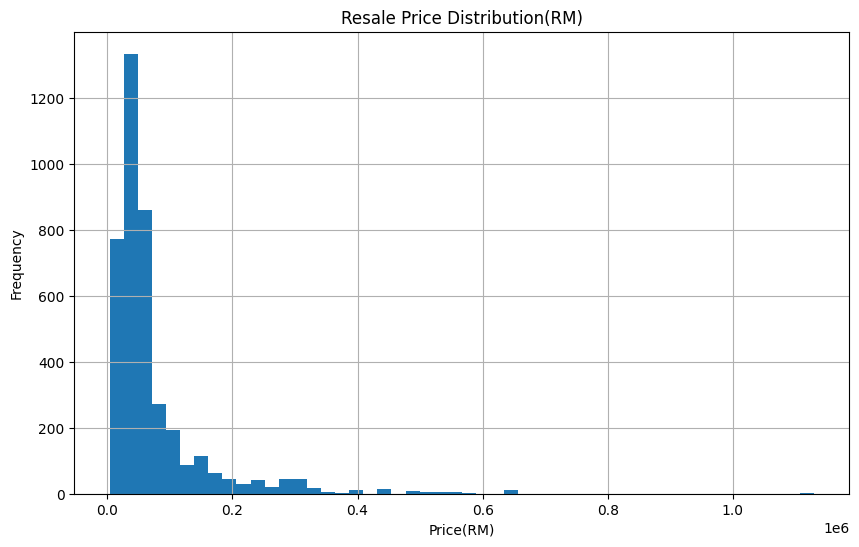

In [ ]:
df['Price(RM)'].hist(bins=50, figsize=(10, 6))
plt.title('Resale Price Distribution(RM)')
plt.xlabel('Price(RM)')
plt.ylabel('Frequency')
plt.show()

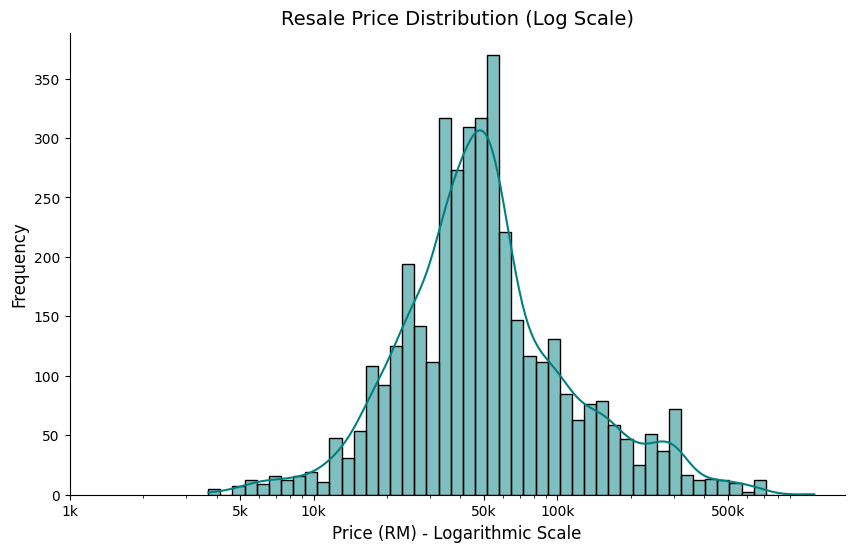

In [ ]:
# Log transformation of histogram for ML training
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# log_scale=True handles the transformation automatically
sns.histplot(data=df, x='Price(RM)', bins=50, log_scale=True, kde=True, color='teal')

plt.title('Resale Price Distribution (Log Scale)', fontsize=14)
plt.xlabel('Price (RM) - Logarithmic Scale', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# This ensures the tick labels are formatted nicely
plt.xticks([1000, 5000, 10000, 50000, 100000, 500000],
           ['1k', '5k', '10k', '50k', '100k', '500k'])

sns.despine()
plt.show()

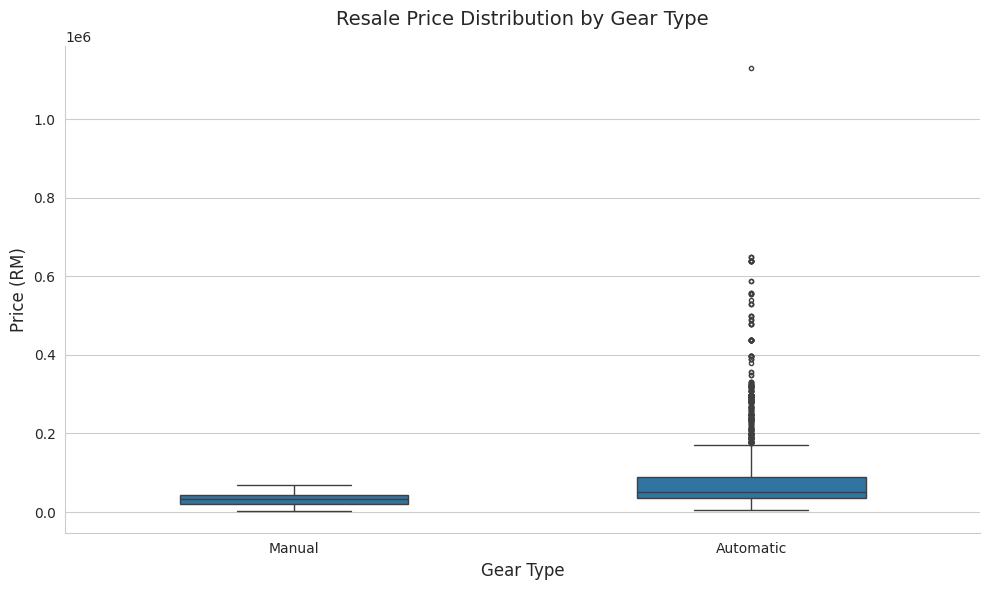

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_style("whitegrid")

# 1. Increase figsize: (Width, Height) - Height helps spread outliers vertically
plt.figure(figsize=(10, 6))

# 2. Adjust parameters:
# width: makes the boxes narrower/wider
# fliersize: controls the size of the outlier dots (smaller looks cleaner)
# whis: (optional) change to 2.0 if you want to categorize only extreme values as outliers
sns.boxplot(
    x='Gear_Type',
    y='Price(RM)',
    data=df,
    width=0.5,           # Narrower boxes make the spread feel more spacious
    fliersize=3,         # Smaller dots for outliers
)

# 3. Clean up the labels and title
plt.title('Resale Price Distribution by Gear Type', fontsize=14, pad=15)
plt.xlabel('Gear Type', fontsize=12)
plt.ylabel('Price (RM)', fontsize=12)

# 4. Remove the top and right "spines" for a modern look
sns.despine()

plt.tight_layout()
plt.show()

Observation:
1. Manual cars' resale price has smaller spread, while Automatic cars' resale price has wider spread.
2. The outliers in Automatic cars' category indicates that most expensive luxury cars fall back in the Automatic Gear-Type category.

**Bivariate Analysis**

What drives the value of a car for resale?

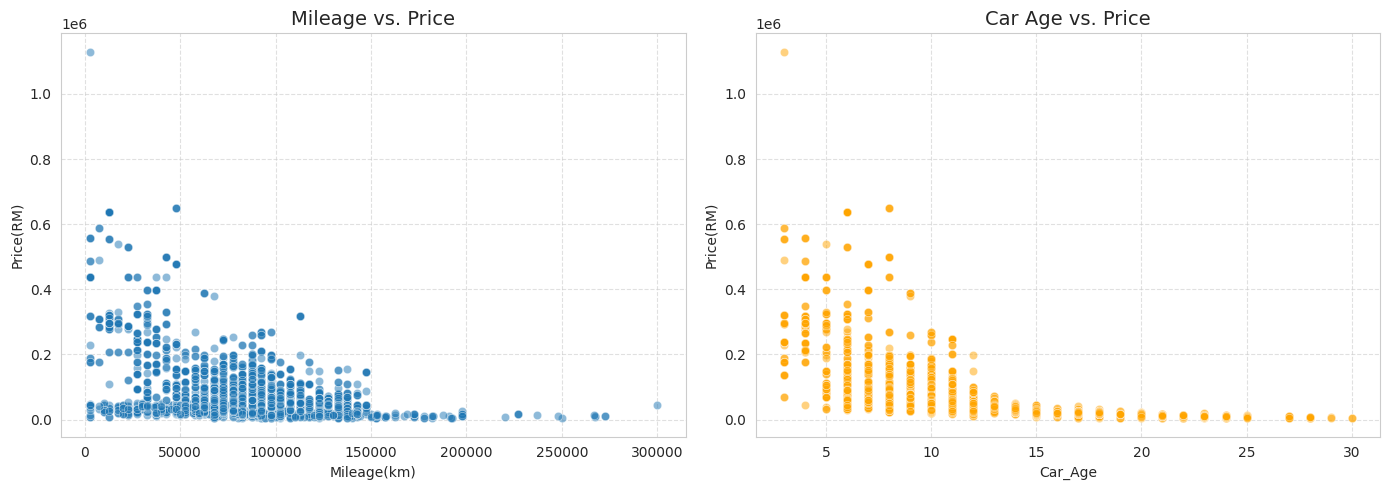

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot 1: Mileage vs Price
sns.scatterplot(data=df, x='Mileage(km)', y='Price(RM)', alpha=0.5, ax=axes[0])
axes[0].set_title('Mileage vs. Price', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Car Age vs Price
sns.scatterplot(data=df, x='Car_Age', y='Price(RM)', alpha=0.5, ax=axes[1], color='orange')
axes[1].set_title('Car Age vs. Price', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

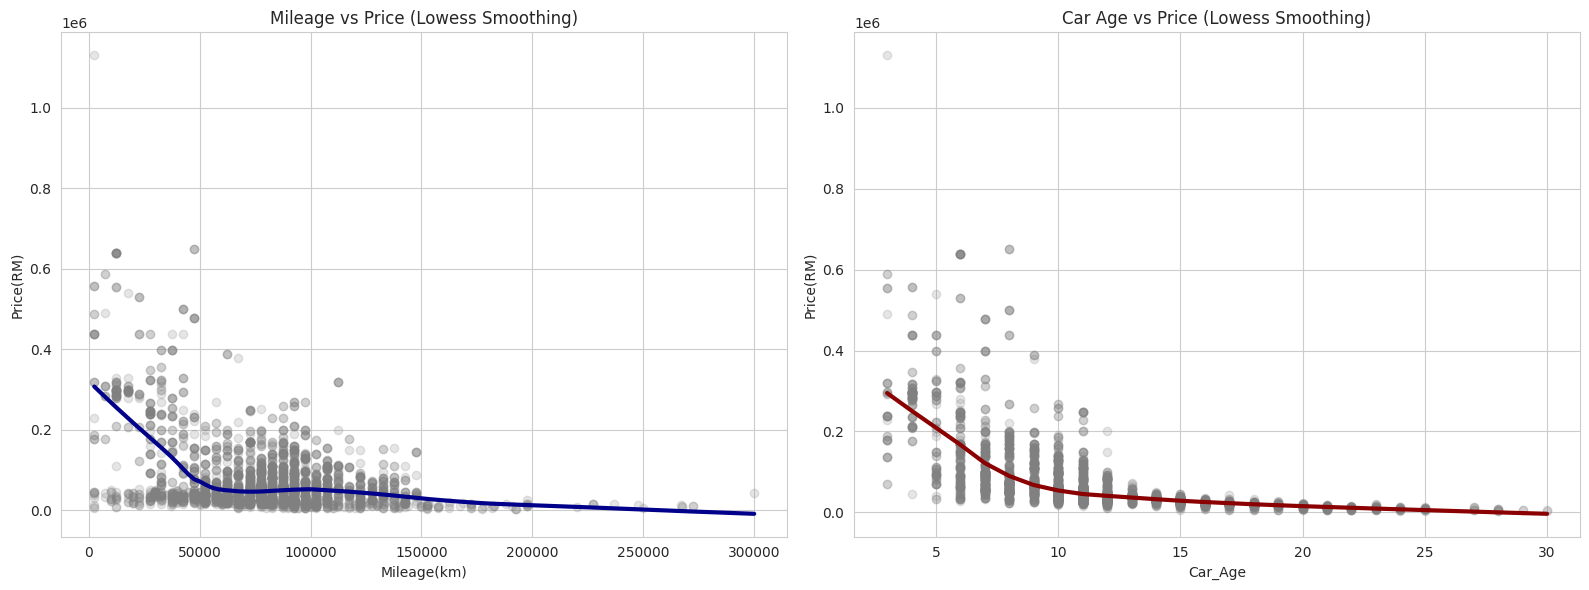

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Use lowess=True for a locally weighted smooth curve
sns.regplot(
    data=df,
    x='Mileage(km)',
    y='Price(RM)',
    lowess=True,         # This creates a "follow the data" curve
    ax=axes[0],
    scatter_kws={'alpha': 0.2, 'color': 'gray'},
    line_kws={'color': 'darkblue', 'lw': 3}
)
axes[0].set_title('Mileage vs Price (Lowess Smoothing)')

sns.regplot(
    data=df,
    x='Car_Age',
    y='Price(RM)',
    lowess=True,
    ax=axes[1],
    scatter_kws={'alpha': 0.2, 'color': 'gray'},
    line_kws={'color': 'darkred', 'lw': 3}
)
axes[1].set_title('Car Age vs Price (Lowess Smoothing)')

plt.tight_layout()
plt.show()

Observation:
1. A downward trend in both graphs indicate a depreciation rate where the greater the mileage, the lower the resale price, and the older the car age, the lower the resale price.
2. Regression lines using the "Lowess" Smoother shows depreciation trend.
3. After a Mileage(km) milestone of 10000km, the Price(RM) drops to below RM200000.00 when major servicing or timing belt changes are usually due.

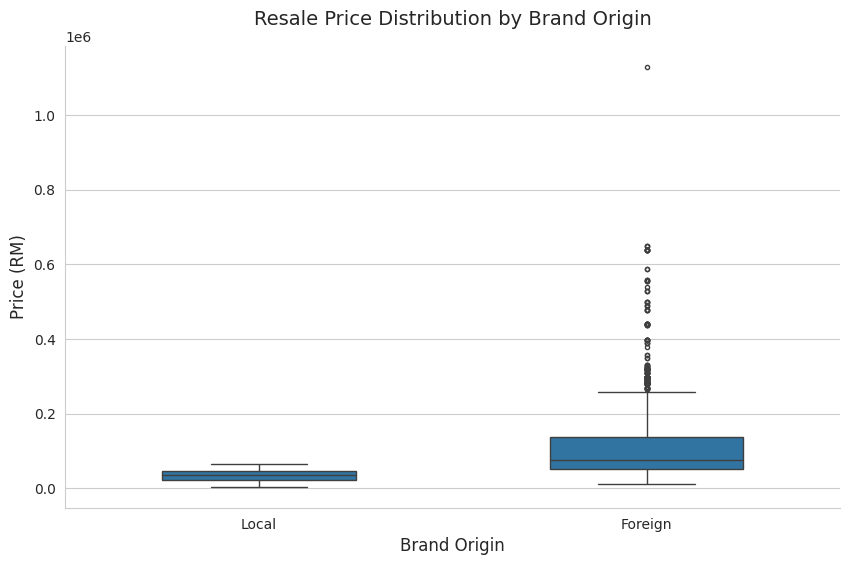

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_style("whitegrid")

# 1. Increase figsize: (Width, Height) - Height helps spread outliers vertically
plt.figure(figsize=(10, 6))

# 2. Adjust parameters:
# width: makes the boxes narrower/wider
# fliersize: controls the size of the outlier dots (smaller looks cleaner)
# whis: (optional) change to 2.0 if you want to categorize only extreme values as outliers
sns.boxplot(
    x='Brand_Origin',
    y='Price(RM)',
    data=df,
    width=0.5,           # Narrower boxes make the spread feel more spacious
    fliersize=3,         # Smaller dots for outliers
)

# 3. Clean up the labels and title
plt.title('Resale Price Distribution by Brand Origin', fontsize=14, pad=15)
plt.xlabel('Brand Origin', fontsize=12)
plt.ylabel('Price (RM)', fontsize=12)

# 4. Remove the top and right "spines" for a modern look
sns.despine()

plt.show()

Observation:
This reveals that Foreign Branded cars might have higher initial prices but steeper depreciation curves compared to Local Branded cars.


**Multivariate Analysis**

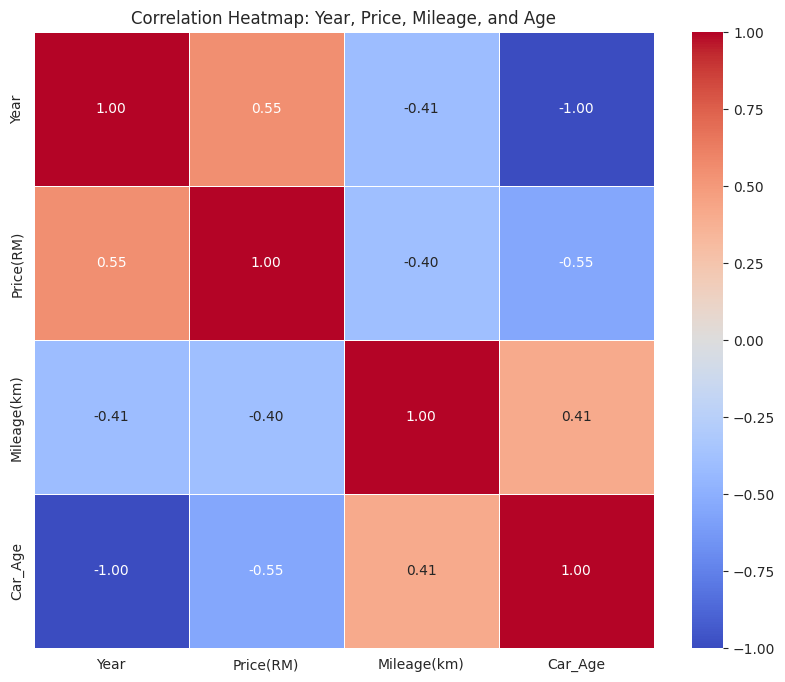

In [ ]:
# Correlation Heatmap between variables [Year, Price, Mileage, Car Age]
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the columns you want to correlate
# Note the double brackets [[ ]]
cols_to_correlate = ['Year', 'Price(RM)', 'Mileage(km)', 'Car_Age']

# 2. Calculate the correlation matrix
corr_matrix = df[cols_to_correlate].corr()

# 3. Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap: Year, Price, Mileage, and Age')
plt.show()


Observation:
Relationships between numerical values such as Year & Price(RM) shows more significant connection than Year & Mileage(km) or Year & Car Age. Since Car Age is calculated based on Year, further analysis can be using Car Age as an interconnected variable.

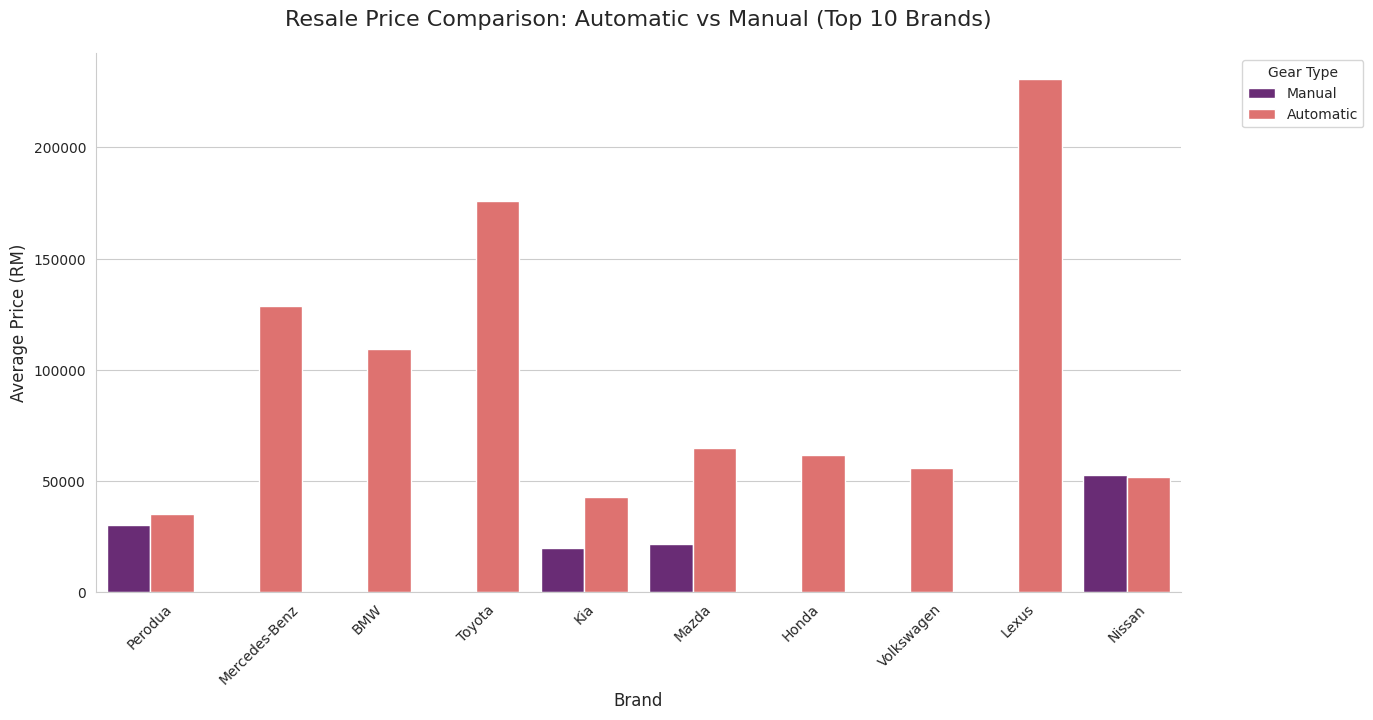

In [ ]:
# Grouped Bar Chart to show Price by Brand & Gear Type (Top10)
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of the top 10 most frequent brands
top_brands = df['Brand'].value_counts().head(10).index

# Filter the dataframe to only include those top 10 brands
df_top = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(14, 7))

# Create the grouped bar chart
sns.barplot(
    data=df_top,
    x='Brand',
    y='Price(RM)',
    hue='Gear_Type',
    estimator='mean',   # Compare the average prices
    errorbar=None,      # Keeps the bars looking clean
    palette='magma'     # Professional looking color palette
)

# Final styling
plt.title('Resale Price Comparison: Automatic vs Manual (Top 10 Brands)', fontsize=16, pad=20)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price (RM)', fontsize=12)
plt.xticks(rotation=45)

# Move the legend outside the plot so it doesn't cover the bars
plt.legend(title='Gear Type', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.show()

Observation:
1. Few of the car brands have Manual Gear-Type cars.
2. For most of the car brands which have Manual Gear-Type cars, its resale value price is smaller than Automatic Gear-Type cars within the same brand.
3. One special case of Nissan brand where the Manual Gear-Type cars have higher resale price than Automatic Gear-Type cars within its brand.

<Figure size 1000x600 with 0 Axes>

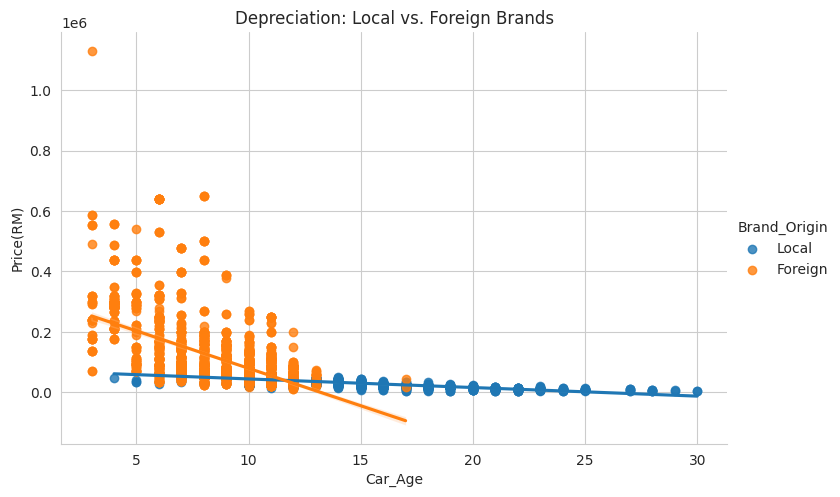

In [ ]:
# Scatter Plot + Regression to show comparison of depreciation rate between local & foreign car brands
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lmplot(x='Car_Age', y='Price(RM)', hue='Brand_Origin', data=df, aspect=1.5)
plt.title('Depreciation: Local vs. Foreign Brands')
plt.show()

Observation:
By comparing depreciation slopes, the price of a Foreign car brand drop faster in a span of 10 years than the price of a Local car brand.

The reason behind this is Local car brands benefit from specific tax exemptions (like excise duty reductions) and have a massive network of spare parts, which keeps their resale value relatively stable compared to Foreign car brands.

Foreign car brands have higher import/excise duties and the resale demand is niche and selective due to availability of car parts/expensive part replacements.

**The "Value Retention" Calculation**

To quantify the effect, the percentage of value retained per year of age can be calculated.

Common Observation in Malaysia:

Local (Perodua/Proton): Often retain ~60-70% value after 3 years.

Foreign (Continental): May drop to 40-50% value in the same period due to higher maintenance costs and steeper initial taxes.

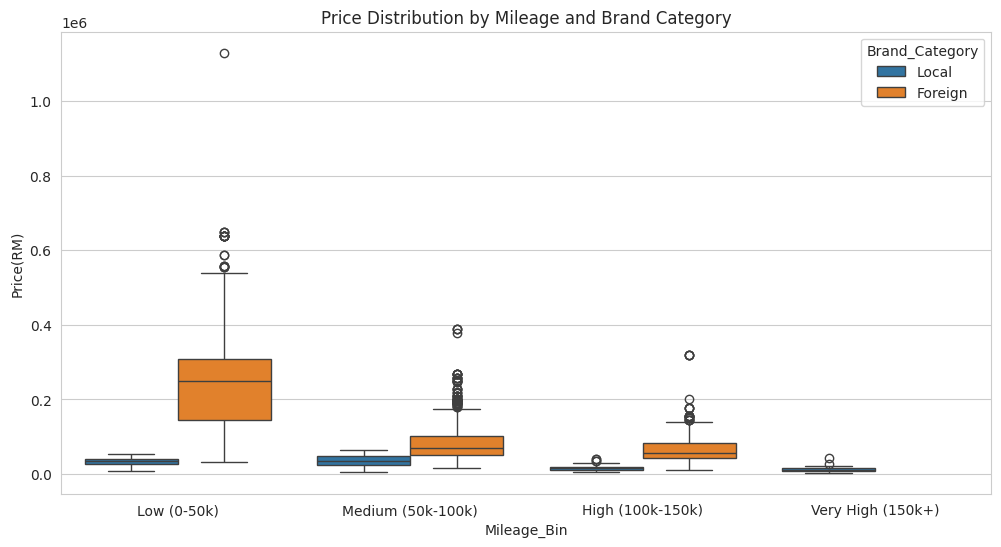

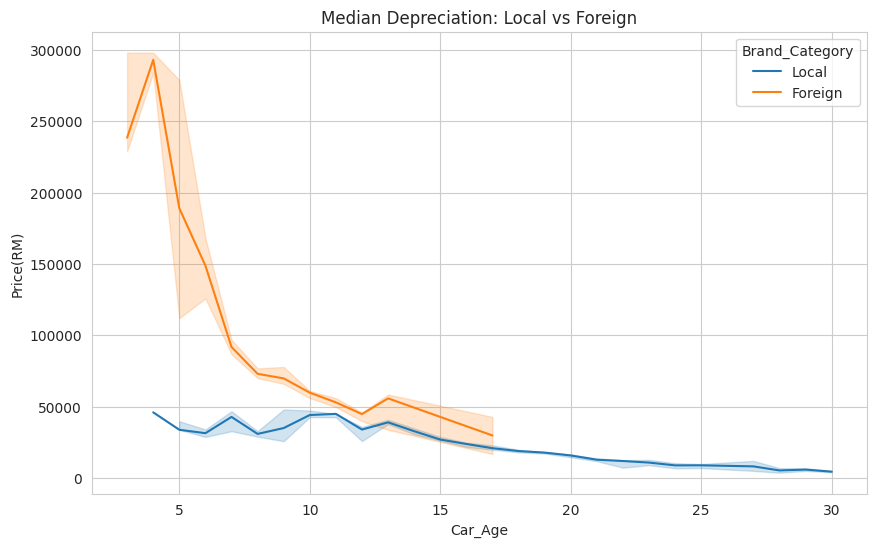

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Categorize Brands
local_brands = ['Proton', 'Perodua']
df['Brand_Category'] = df['Brand'].apply(lambda x: 'Local' if x in local_brands else 'Foreign')

# 2. Bin the Mileage (km)
bins = [0, 50000, 100000, 150000, float('inf')]
labels = ['Low (0-50k)', 'Medium (50k-100k)', 'High (100k-150k)', 'Very High (150k+)']
df['Mileage_Bin'] = pd.cut(df['Mileage(km)'], bins=bins, labels=labels)

# 3. Visualize the Price vs Mileage Bin
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mileage_Bin', y='Price(RM)', hue='Brand_Category', data=df)
plt.title('Price Distribution by Mileage and Brand Category')
plt.savefig('price_mileage_bin.png')

# 4. Visualize the Depreciation Slope
plt.figure(figsize=(10, 6))
sns.lineplot(x='Car_Age', y='Price(RM)', hue='Brand_Category', data=df, estimator='median')
plt.title('Median Depreciation: Local vs Foreign')
plt.savefig('depreciation_curve.png')

Why is it "Incomplete"?
Data Availability: In the Malaysian market (implied by RM and brands like Proton/Perodua), foreign cars (BMW, Mercedes, Toyota, etc.) from 20+ years ago are often scrapped or sold in such low volumes that they don't appear in modern used-car datasets.

The "Local" Survival: Proton and Perodua cars are often kept on the road much longer due to cheaper maintenance, which is why your blue line extends all the way to 30 years.

Foreign cars lose value rapidly and disappear from this market's data after 17 years, while local cars persist. To make this look "intentional," you can add a grid and clearer axis markers.

Key Observations from the Analysis (summarized in the charts above):

***Steeper "Foreign" Depreciation:***

Foreign cars (especially Continental brands like BMW/Mercedes) start with very high prices but show a much steeper drop in the first 5 years.

***The "Value Floor" for Local Cars:***

Local cars (Proton/Perodua) have a much flatter depreciation curve. Even at "Very High" mileage (150k+ km), their prices remain relatively stable.

***Price Convergence:***

Interestingly, as mileage increases to the "Very High" category, the price gap between Local and Foreign cars narrows significantly. This suggests that high-mileage foreign cars lose their "prestige premium" faster than local cars lose their "utility value."

***The "100k km" Threshold:***

Notice a significant price drop for Foreign cars once they cross the 100,000 km mark, often due to the expiration of warranties and the onset of more expensive maintenance schedules.